In [2]:
import librosa as lr
import numpy as np
import scipy.signal as signal
import soundfile as sf
import matplotlib.pyplot as plt
from scipy.io import wavfile
import IPython.display as ipd

In [51]:
filepath = 'C:\\Users\\chorj\\Downloads\\WavFiles'
input_file1 = filepath + '\\Hercules_dry_Drums_Kick.wav'
input_file2 = filepath + '\\Hercules_dry_Drums_Loop.wav'

# Read the wav file 
samplerate1, data1 = wavfile.read(input_file1)
samplerate2, data2 = wavfile.read(input_file2)
print('Sampling rate = ', samplerate1)
dt1, sr1 = lr.load(input_file1, sr = samplerate1)
dt2, sr2 = lr.load(input_file2, sr = samplerate2)


C:\Users\chorj\AppData\Local\Temp\ipykernel_36800\4167989557.py:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate1, data1 = wavfile.read(input_file1)
C:\Users\chorj\AppData\Local\Temp\ipykernel_36800\4167989557.py:7: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate2, data2 = wavfile.read(input_file2)


Sampling rate =  44100


In [52]:
#200000~400000 부분의 샘플만을 가져옵니다
sample1 = data1[250000:850000]
sample2 = data2[250000:850000]
#sample = data[1000000:1500000] : for consecutive data
s1 = dt1[250000:850000]
s2 = dt2[250000:850000]




In [14]:
def plot_waveform(sample, isLibrosa = False):

    plt.figure(figsize=(12, 4))
    if isLibrosa:
        plt.plot(sample, label="Combined Audio Waveform")
    else:
        plt.plot(np.mean(sample, axis=1), label="Combined Audio Waveform")
    plt.title("Stereo Audio Waveform")
    plt.xlabel("Sample Index")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.show()


def plot_spectrogram(sample, sample_rate, title="Spectrogram", size=(12, 4)):
    plt.figure(figsize=size)
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Frequency")
    plt.show()

def plot_waveform_withBounds(sample, non_silent_segments , isLibrosa = False):
    plt.figure(figsize=(12, 4))
    if isLibrosa:
        plt.plot(sample, label="Combined Audio Waveform")
    else:
        plt.plot(np.mean(sample, axis=1), label="Combined Audio Waveform")
    for start, end in non_silent_segments:
        plt.axvline(x=start, color='green', linestyle='--', label="Segment Start")
        plt.axvline(x=end, color='red', linestyle='--', label="Segment End")
        #print(f"Non-silent segment: Start = {start}, End = {end}")

    plt.title("Stereo Audio with Non-Silent Segments")
    plt.xlabel("Sample Index")
    plt.ylabel("Amplitude")
    #plt.legend()
    plt.show()



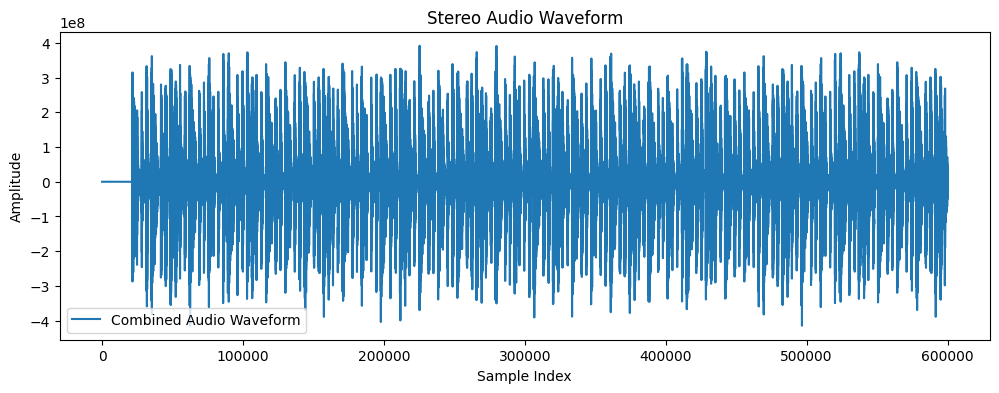

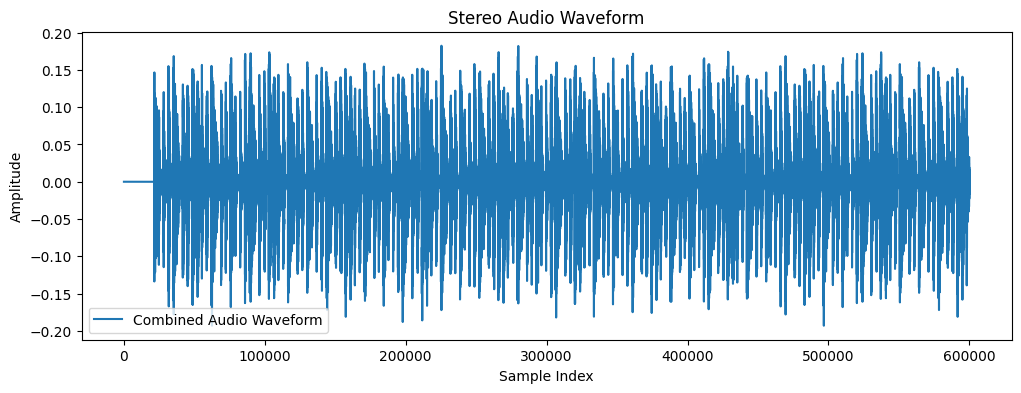

In [24]:
plot_waveform(sample2)
plot_waveform(s2, isLibrosa=True)



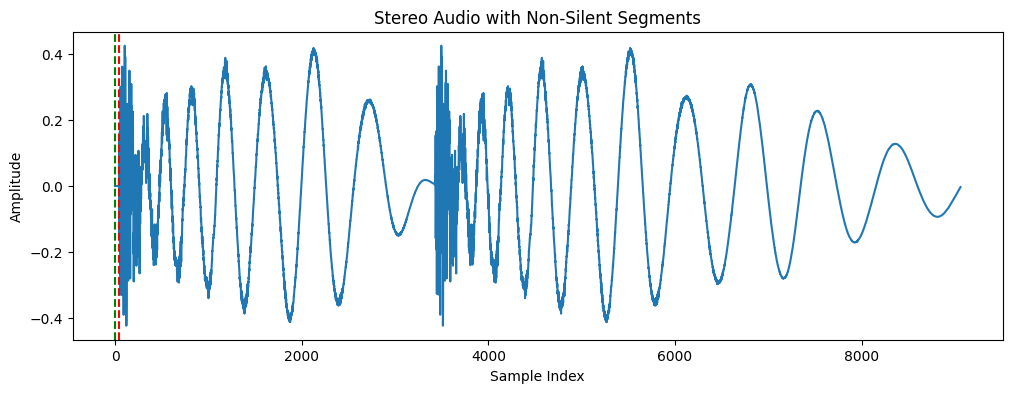

In [102]:
def has_consecutive_zeros(data, startindex, silence_threshold = 0, window = 20):
    if silence_threshold != 0:
        for i in range(window):
            if abs(data[startindex+i]) < 0:
                return False
        return True
    else:
        for i in range(window):
            if data[startindex+i] != 0:
                return False
        return True        

def find_blocks(data, silence_threshold = 0, window = 20, isLibrosa = False):

    # Calculate the minimum length for a segment based on minimum duration
    if isLibrosa:
        combined_data = data
    else:
        combined_data = np.mean(data, axis=1)
    # Initialize variables
    segments = []
    start_index = None

    # Iterate over the combined audio data
    for i, sample in enumerate(combined_data):
        if len(combined_data) - i > window:
            if combined_data[i] == 0:
                if has_consecutive_zeros(combined_data, i, silence_threshold, window):
                    if start_index is None:
                        start_index = i
            else:
                if start_index is not None and i - start_index > window:
                    segments.append((start_index, i))
                    start_index = None 


    # Check for the last segment
    if start_index is not None and len(combined_data) - start_index > window:
        segments.append((start_index, len(combined_data) - 20))

    return segments


# Define the silence threshold
silence_threshold = 0  # Adjust this based on your audio

# Find non-silent segments
#blocks1 = find_blocks(s1,  isLibrosa = True)
blocks2 = find_blocks(s1[990:10050], isLibrosa = True)
#plot_waveform_withBounds(s1, blocks1, isLibrosa = True)
plot_waveform_withBounds(s1[990:10050], blocks2, isLibrosa = True)


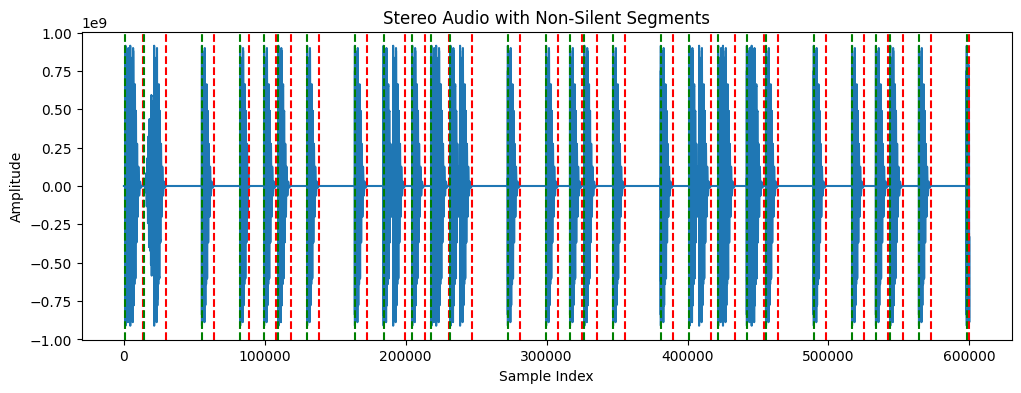

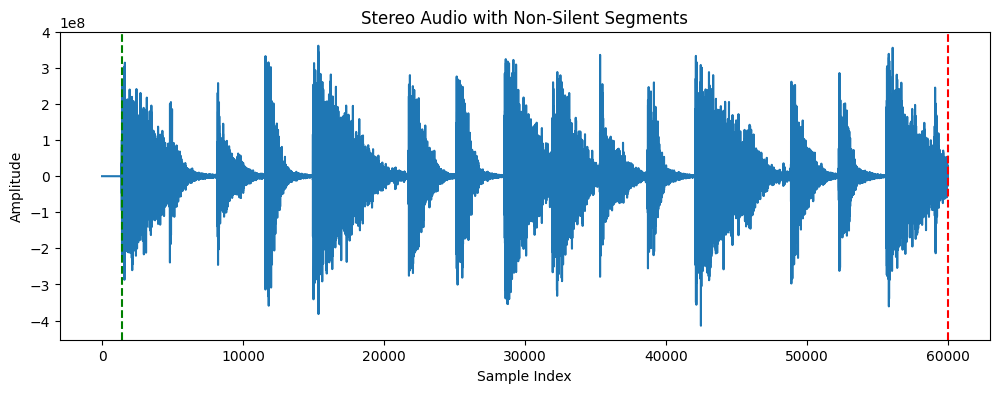

In [120]:
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt

def find_non_silent_segments(data, silence_threshold, min_duration=0.1):
    """Find non-silent segments in the stereo audio data."""
    # Calculate the minimum length for a segment based on minimum duration
    min_segment_length = min_duration

    # Combine stereo channels by averaging
    combined_data = np.mean(data, axis=1)

    # Initialize variables
    segments = []
    start_index = None

    # Iterate over the combined audio data
    for i, sample in enumerate(combined_data):
        if abs(sample) > silence_threshold:
            if start_index is None:
                start_index = i
        else:
            if start_index is not None and i - start_index > min_segment_length:
                segments.append((start_index, i))
                start_index = None

    # Check for the last segment
    if start_index is not None and len(combined_data) - start_index > min_segment_length:
        segments.append((start_index, len(combined_data)))

    return segments


# Define the silence threshold
silence_threshold = 0  # Adjust this based on your audio

# Find non-silent segments
non_silent_segments1 = find_non_silent_segments(sample1,silence_threshold, min_duration=0.001)
non_silent_segments2 = find_non_silent_segments(sample2[20000:80000],silence_threshold, min_duration=0.01)
plot_waveform_withBounds(sample1, non_silent_segments1)
plot_waveform_withBounds(sample2[20000:80000], non_silent_segments2)


In [75]:
print('Number of non-silent segments = ', len(non_silent_segments1))
for i in range(len(non_silent_segments1)):
    print('Non-silent segment ', i+1, ' = ', non_silent_segments1[i], "duration: " + str((non_silent_segments1[i][1] - non_silent_segments1[i][0])))

Number of non-silent segments =  28
Non-silent segment  1  =  (1032, 13244) duration: 12212
Non-silent segment  2  =  (14600, 30206) duration: 15606
Non-silent segment  3  =  (55309, 64129) duration: 8820
Non-silent segment  4  =  (82447, 89012) duration: 6565
Non-silent segment  5  =  (99409, 108229) duration: 8820
Non-silent segment  6  =  (109586, 118406) duration: 8820
Non-silent segment  7  =  (129939, 138759) duration: 8820
Non-silent segment  8  =  (163863, 172683) duration: 8820
Non-silent segment  9  =  (184216, 199821) duration: 15605
Non-silent segment  10  =  (204570, 213390) duration: 8820
Non-silent segment  11  =  (218139, 230352) duration: 12213
Non-silent segment  12  =  (231709, 247313) duration: 15604
Non-silent segment  13  =  (272416, 281236) duration: 8820
Non-silent segment  14  =  (299555, 308375) duration: 8820
Non-silent segment  15  =  (316516, 325336) duration: 8820
Non-silent segment  16  =  (326693, 335513) duration: 8820
Non-silent segment  17  =  (347047

In [76]:
def exactSame(wav1, wav2):
    for i in range(len(wav1)):
        if wav1[i][0] != wav2[i][0] or wav1[i][1] != wav2[i][1]:
            return False
    return True

def checkSimilarity(wav1, wav2):
    length = len(wav1)
    difflength = 0
    diffratio = 0
    for i in range(len(wav1)):
        if wav1[i][0] != wav2[i][0] or wav1[i][1] != wav2[i][1]:
            difflength += 1
            diffratio += (wav2[i][1]/wav1[i][1] + wav2[i][1]/wav1[i][0])/2
            if difflength < 2:
                print("Different sample: wav1: " + str(wav1[i][0]) +"/" + str(wav1[i][1]) 
                + ", wav2: " + str(wav2[i][0]) + "/"+ str(wav2[i][1]))
    
    evaluation = diffratio / difflength * 100
    diffportion = difflength 
    print("Different samples: " + str(diffportion) + ", Evaluation: " + str(evaluation))

def checkDuplicate(wav, indexlist, duration):
    getfirst = True
    for i in range(len(indexlist)):
        startindex = indexlist[i][0]
        endindex = indexlist[i][1]
        if endindex - startindex == duration:
            if getfirst:
                Target = wav[startindex:endindex]
                getfirst = False
            else:
                #print("Comparing with the segment " + str(startindex) + " to " + str(endindex) + " duration= " + str(endindex - startindex) )
                if exactSame(Target, wav[startindex:endindex]):                  
                    print("Duplicate Found")
                else: 
                    print("Not a Duplicate")
                    checkSimilarity(Target, wav[startindex:endindex])

checkDuplicate(sample1, non_silent_segments1, 8820)

Not a Duplicate
Different sample: wav1: 800256/777472, wav2: 800000/777472
Different samples: 163, Evaluation: 95.52084869087912
Duplicate Found
Not a Duplicate
Different sample: wav1: 548032256/375911936, wav2: 548032000/375911936
Different samples: 1, Evaluation: 84.29651556860186
Duplicate Found
Not a Duplicate
Different sample: wav1: 548032256/375911936, wav2: 548032000/375911936
Different samples: 1, Evaluation: 84.29651556860186
Not a Duplicate
Different sample: wav1: 548032256/375911936, wav2: 548032000/375911936
Different samples: 1, Evaluation: 84.29651556860186
Duplicate Found
Not a Duplicate
Different sample: wav1: 548032256/375911936, wav2: 548032000/375911936
Different samples: 1, Evaluation: 84.29651556860186
Not a Duplicate
Different sample: wav1: 548032256/375911936, wav2: 548032000/375911936
Different samples: 1, Evaluation: 84.29651556860186
Duplicate Found
Not a Duplicate
Different sample: wav1: 548032256/375911936, wav2: 548032000/375911936
Different samples: 1, Eva

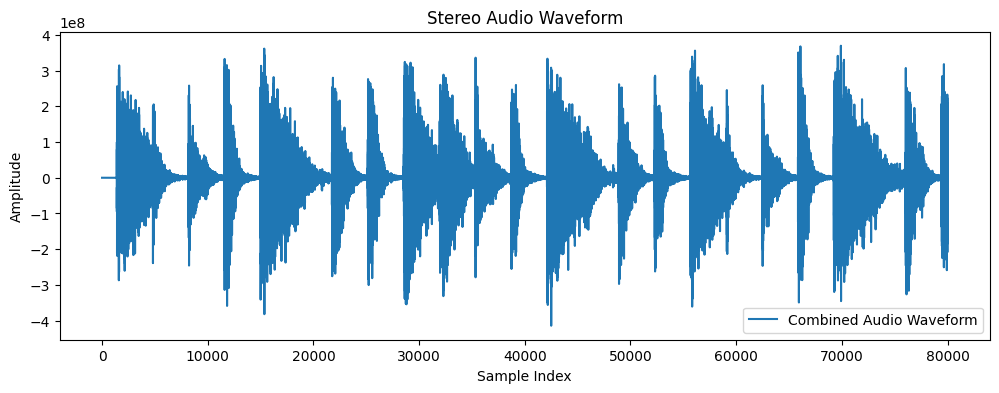

In [158]:
sample3 = sample2[20000:100000]

plot_waveform(sample3)

In [165]:
def wavfile_to_librosa(audio):
    maxvolume = np.iinfo(audio.dtype).max
    for i in range(len(audio)):
        audio[i][0] = float(audio[i][0]) / maxvolume
        audio[i][1] = float(audio[i][1]) / maxvolume
    audio = lr.to_mono(audio)
    print(len(audio))
    return audio

def show_spectrogram(audio, sr):
    fig, ax = plt.subplots()
    S = lr.feature.melspectrogram(y=audio, sr=sr)
    D = lr.power_to_db(S, ref=np.max)
    plt.figure(figsize=(10, 4))
    lr.display.specshow(D, sr=sr, y_axis='log', x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel-scaled spectrogram')
    plt.ylim(20, None)  # Set the y-axis range to be greater than 20

samplemod = wavfile_to_librosa(sample3)


ipd.Audio(samplemod, rate=44100)



ParameterError: Audio data must be floating-point

In [92]:
##DO NOT USE

def localmin (sample, index, windowsize = 100):
    return np.mean(sample[index:index+windowsize, 0] + sample[index:index+windowsize, 1])/2

print (localmin(sample3, 1300))

def get_localmin(sample, windowsize = 100):
    maxValue = np.max(sample[:,0] + sample[:,1])/2
    threshold_high = 0.1 * maxValue

    for i in range(len(sample) - windowsize):

        if sample[i] > threshold_high:
            j = i-windowsize
                    
        localminlist.append(localmin(sample, i, windowsize))
    return localminlist
    


221303.04


In [ ]:
##DO NOT USE
def slice_continuous_audio(sample):
    ans = []
    limit = len(sample)
    maxValue = np.max(sample[:,0] + sample[:,1])/2
    threshold_high = 0.1 * maxValue
    threshold_low  = 0.05 * maxValue
    exceeded = False
    for i in range(len(sample)):
        if exceeded == False and sample[i][0] > threshold:
            exceeded = True
            #find local minimum of window size of 100
            localmin = np.min(sample[i:i+100,0])
            print(localmin)
        elif exceeded == True and i+100 < limit :
            for i in range (i, i+100):
                if sample[i][0] < threshold_low:
                    end = i
                    break

            if i > limit or sample[i][0] < threshold:
                exceeded = False

        
        ans.append([localmin, end])

    return ans

In [78]:
def list_of_consecutive_zeros(sample, threshold, duration):
    start_index = None
    segments = []
    for i, sample in enumerate(sample):
        if abs(sample[0]) < threshold and abs(sample[1]) < threshold:
            if start_index is None:
                start_index = i
        else:
            if start_index is not None:
                if i - start_index > duration:
                    segments.append((start_index, i))
                start_index = None
    return segments

a = list_of_consecutive_zeros(sample3, 3000000, 10)

for i in range(len(a)):
    print("Start index: " + str(a[i][0]) +", until: " + str(a[i][1]) + " //Duration: " +  str(a[i][1]- a[i][0]))

Start index: 0, until: 1399 //Duration: 1399
Start index: 7327, until: 7340 //Duration: 13
Start index: 7487, until: 7499 //Duration: 12
Start index: 7556, until: 7573 //Duration: 17
Start index: 7764, until: 7775 //Duration: 11
Start index: 7819, until: 7832 //Duration: 13
Start index: 7883, until: 7899 //Duration: 16
Start index: 7908, until: 7920 //Duration: 12
Start index: 7943, until: 7975 //Duration: 32
Start index: 7976, until: 8007 //Duration: 31
Start index: 8008, until: 8021 //Duration: 13
Start index: 8024, until: 8039 //Duration: 15
Start index: 8047, until: 8084 //Duration: 37
Start index: 8085, until: 8111 //Duration: 26
Start index: 8114, until: 8158 //Duration: 44
Start index: 8164, until: 8175 //Duration: 11
Start index: 10891, until: 10902 //Duration: 11
Start index: 11410, until: 11431 //Duration: 21
Start index: 11436, until: 11447 //Duration: 11
Start index: 14240, until: 14258 //Duration: 18
Start index: 14270, until: 14281 //Duration: 11
Start index: 14327, until

In [81]:
def find_non_silent_segments(data, silence_threshold, min_duration=0.1):

# Calculate the minimum length for a segment based on minimum duration
    min_segment_length = min_duration

    # Combine stereo channels by averaging
    combined_data = np.mean(data, axis=1)

    # Initialize variables
    segments = []
    start_index = None

    # Iterate over the combined audio data
    for i, sample in enumerate(combined_data):
        if abs(sample) > silence_threshold:
            if start_index is None:
                start_index = i
        else:
            if start_index is not None and i - start_index > min_segment_length:
                segments.append((start_index, i))
                start_index = None

    # Check for the last segment
    if start_index is not None and len(combined_data) - start_index > min_segment_length:
        segments.append((start_index, len(combined_data)))

    return segments

In [ ]:
def compare_similar(listA, listB):


In [ ]:
class Audiopackage:
    
    #indexlist = list of [start, end]
    #audio = audio data

    indexlist = []
    
    def __init__(self, audio, samplerate, parsetype):
        self.audiosegmentlist = [] 
        self.audio = audio
        self.samplerate = samplerate
        self.audioIndex = find_non_silent_segments(audio, 1000, 0.001) 
        self.parsetype = parsetype
        parse(self.type)
        self.length = len(audio)
    
    def parse(self):
         for i in range(len(self.audioIndex)):
            if len(indexlist) == 0:
                indexlist.append([0, self.length])
            else:
                for i in range(len(indexlist)):
                    if lengthExists(i):
                        
                        indexlist[i].append(audioIndex[i])
                    else:
                        indexlist.append([audioIndex[i]])
       
        if self.parsetype == "exact":
            compareExact()
        elif self.parsetype == "similar":
            compareSimilar()
        elif self.parsetype == "spectrogram":
            compareSpectrogram()
        else:
            print("Error: Invalid type")

    def lengthExists(self, i):
        if self.parsetype == "exact":
            for i in range(len(indexlist)):
                for j in range(len(audioIndex)):
                    if (audioIndex[j][1] - audioIndex[j][0]) in indexlist[i]:
                        return True
        else:
            for i in range(len(indexlist)):
                for j in range(len(audioIndex)):
                    if abs((audioIndex[j][1] - audioIndex[j][0] - indexlist[i])/indexlist[i]) < 0.1
                        return True
        return False

    def parseExact(self):
        
        for i in range(len(self.audioIndex)):
            if len(indexlist) == 0:
                indexlist.append([0, self.length])
            else:
                for i in range(len(indexlist)):
                    if lengthExists(i):
                        
                        indexlist[i].append(audioIndex[i])
                    else:
                        indexlist.append([audioIndex[i]])

        #if a segment exact same, then append
        # indexlist[9].append(index)
            #compare length first
            #if length is same, then compare each sample
        #else indexlist.append(AudioSegment(audio, length, index))
        pass
    def parseSimilar(self):
        pass
    def parseSpectrogram(self):
        pass


    def print(self):
        for i in range (len(self.audiosegmentlist)):
            print(self.audiosegmentlist[i])
    def get_compression_ratio(self):
        baseline = len(self.audio)
        compressed = 0
        for i in range(len(self.audiosegmentlist)):
            compressed += self.audiosegmentlist[i].length
        return float(baseline/compressed)


class AudioSegment:
    #처음 불릴때
    def __init__(self, audio, length, index, amplitude = 1):
        self.indexlist = [] 
        indexlist.append(index)
        self.length = length
        self.audio = audio
        self.amplitude = amplitude
    def __str__(self):
        return "SampleLength: " + str(self.length) + " , IndexList: " + str(self.indexlist)
    def append(self, index, amplitude = 1):
        #초기 샘플보다 후기 샘플이 더 adaptable 할 경우
        self.indexlist.append(index)

In [ ]:
import soundfile as sf

# Specify the input and output file paths
input_file = 'path/to/input.wav'
output_file = 'path/to/output.flac'

# Read the WAV file
data, samplerate = sf.read(input_file)

# Write the FLAC file
sf.write(output_file, data, samplerate, format='flac')


In [ ]:
import zipfile

# Specify the input WAV file path
input_file = 'path/to/input.wav'

# Specify the output ZIP file path
output_file = 'path/to/output.zip'

# Create a new ZIP file
with zipfile.ZipFile(output_file, 'w') as zipf:
    # Add the WAV file to the ZIP file
    zipf.write(input_file, arcname='audio.wav')


In [75]:
def find_non_zero_ratio(sample):
    count = 0
    for i in range(len(sample)):
        if sample[i][0] == 0 and sample[i][1] == 0:
            count += 1
    return round(1 - count/len(sample),4)

find_zero_ratio(sample1)

0.54

In [79]:
import soundfile as sf
import zipfile
import os
import time

def compare_compression_ratio(input_file):
    # Specify the output file paths
    flac_output_file = 'compressed.flac'
    zip_output_file = 'compressed.zip'

    # Read the WAV file
    data, samplerate = sf.read(input_file)

    start_time = time.time()
    # Write the FLAC file
    sf.write(flac_output_file, data, samplerate, format='flac')
    # time
    flac_time = time.time() - start_time

    start_time = time.time()
    # Create a new ZIP file
    with zipfile.ZipFile(zip_output_file, 'w', compression=zipfile.ZIP_DEFLATED) as zipf:
        # Add the WAV file to the ZIP file
        zipf.write(input_file, arcname='audio.wav')
    # time
    zip_time = time.time() - start_time

    # Get the file sizes
    input_size = os.path.getsize(input_file)
    flac_size = os.path.getsize(flac_output_file)
    zip_size = os.path.getsize(zip_output_file)

    # Calculate the compression ratios
    flac_ratio = flac_size / input_size
    zip_ratio = zip_size / input_size
    non_zero_ratio = find_non_zero_ratio(data)
    print("Ratio of non-zero: " + str(non_zero_ratio))
    # Print the results
    print(f"FLAC Compression Ratio: {flac_ratio:.4f}")
    print(f"ZIP Compression Ratio: {zip_ratio:.4f}")
    
    #TODO: print time

    # Delete the temporary files
    os.remove(flac_output_file)
    os.remove(zip_output_file)
    return [non_zero_ratio, flac_ratio, zip_ratio, flac_time, zip_time]


In [78]:

compare_compression_ratio(input_file1)

Ratio of non-zero: 0.4512
FLAC Compression Ratio: 0.1391
ZIP Compression Ratio: 0.3661


[0.4512, 0.13914049406402765, 0.36612599549920144]

In [64]:
compare_compression_ratio(input_file2)

Size of Zero: 0.66
FLAC Compression Ratio: 0.24
ZIP Compression Ratio: 0.59


In [ ]:
import glob

# Specify the folder path
folder_path = 'C:\\Users\\chorj\\Downloads\\WavFiles\\Hercules_Dry(AbelEdit)'

# Find all WAV files in the folder
wav_files = glob.glob(folder_path + '/*.wav')

# Print the list of WAV files
for file in wav_files:
    print(file)


In [80]:
def analyze_folder(folder_path):
    # Find all WAV files in the folder
    wav_files = glob.glob(folder_path + '/*.wav')
    resultList = []
    # Print the list of WAV files
    for file in wav_files:
        print(file)
        resultList.append(compare_compression_ratio(file))
    return [resultList]


In [81]:
resultList = analyze_folder(folder_path)    

C:\Users\chorj\Downloads\WavFiles\Hercules_Dry(AbelEdit)\Hercules_dry_Bass_BassTop.wav
Ratio of non-zero: 0.73
FLAC Compression Ratio: 0.0889
ZIP Compression Ratio: 0.5792
C:\Users\chorj\Downloads\WavFiles\Hercules_Dry(AbelEdit)\Hercules_dry_Bass_Sub.wav
Ratio of non-zero: 0.7873
FLAC Compression Ratio: 0.0577
ZIP Compression Ratio: 0.7135
C:\Users\chorj\Downloads\WavFiles\Hercules_Dry(AbelEdit)\Hercules_dry_Brass_Horns.wav
Ratio of non-zero: 0.8507
FLAC Compression Ratio: 0.1985
ZIP Compression Ratio: 0.7520
C:\Users\chorj\Downloads\WavFiles\Hercules_Dry(AbelEdit)\Hercules_dry_Brass_Low Brs.wav
Ratio of non-zero: 0.8055
FLAC Compression Ratio: 0.1624
ZIP Compression Ratio: 0.7061
C:\Users\chorj\Downloads\WavFiles\Hercules_Dry(AbelEdit)\Hercules_dry_Brass_Trombone.wav
Ratio of non-zero: 0.1763
FLAC Compression Ratio: 0.0406
ZIP Compression Ratio: 0.1430
C:\Users\chorj\Downloads\WavFiles\Hercules_Dry(AbelEdit)\Hercules_dry_Brass_Trumpet.wav
Ratio of non-zero: 0.7558
FLAC Compression Rat

In [88]:
print(resultList[1][2][0] + resultList[1][2][1] + resultList[1][2][2])

1.801144843356444


In [89]:
non_zero_ratio = 0
flac_ratio = 0
zip_ratio = 0
for i in range(len(resultList)):
    non_zero_ratio += float(resultList[i][0])
    flac_ratio += float(resultList[i][1])
    zip_ratio += float(resultList[i][2])

print("Average non-zero ratio: " + str(non_zero_ratio/len(resultList)))
print("Average flac ratio: " + str(flac_ratio/len(resultList)))
print("Average zip ratio: " + str(zip_ratio/len(resultList)))

print("Zip to non-zero Compression ratio: " + str(zip_ratio/non_zero_ratio))
print("FLAC to non-zero Compression ratio: " + str(flac_ratio/non_zero_ratio))
print("Zip to FLAC Compression ratio: " + str(flac_ratio/zip_ratio))

Average non-zero ratio: 0.75865
Average flac ratio: 0.07329174293944803
Average zip ratio: 0.6463672717099354
Zip to non-zero Compressoin ratio: 0.8519966673827658
FLAC to non-zero Compressoin ratio: 0.09660811037955318
Zip to FLAC Compressoin ratio: 0.11339024444346948


In [90]:
folder_path2 = 'C:\\Users\\chorj\\Downloads\\WavFiles\\dummy'

resultList2 = analyze_folder(folder_path2)


C:\Users\chorj\Downloads\WavFiles\dummy\Tell Me.wav
Ratio of non-zero: 0.9997
FLAC Compression Ratio: 0.4721
ZIP Compression Ratio: 0.9861
